In [2]:
import sys
sys.path.append('../../../')

import VESIcal as v
import pandas as pd

In [6]:
alkbasalt = {'SiO2': 49.0, 
                'TiO2': 1.27, 
                'Al2O3': 19.7, 
                'Fe2O3': 3.74, 
                'FeO': 5.33,
                'MnO': 0.17, 
                'MgO': 4.82, 
                'CaO': 8.85, 
                'Na2O': 4.23, 
                'K2O': 1.00, 
                'P2O5': 0.37,
                'H2O': 4.51,
                'CO2': 0.25}

rhyolite = {'SiO2':77.19,
                 'TiO2':0.06,
                 'Al2O3':12.80,
                 'FeO':0.94,
                 'MgO':0.03,
                 'CaO':0.53,
                 'Na2O':3.98,
                 'K2O':4.65,
                 'CO2':0.05,
                 'H2O':0.26}

sample_table = pd.DataFrame([alkbasalt, rhyolite], index=["Alkali Basalt", "Rhyolite"])
sample_table

SiO2  TiO2  Al2O3  Fe2O3   FeO   MnO   MgO   CaO  Na2O   K2O  \
Alkali Basalt  49.00  1.27   19.7   3.74  5.33  0.17  4.82  8.85  4.23  1.00   
Rhyolite       77.19  0.06   12.8    NaN  0.94   NaN  0.03  0.53  3.98  4.65   

               P2O5   H2O   CO2  
Alkali Basalt  0.37  4.51  0.25  
Rhyolite        NaN  0.26  0.05

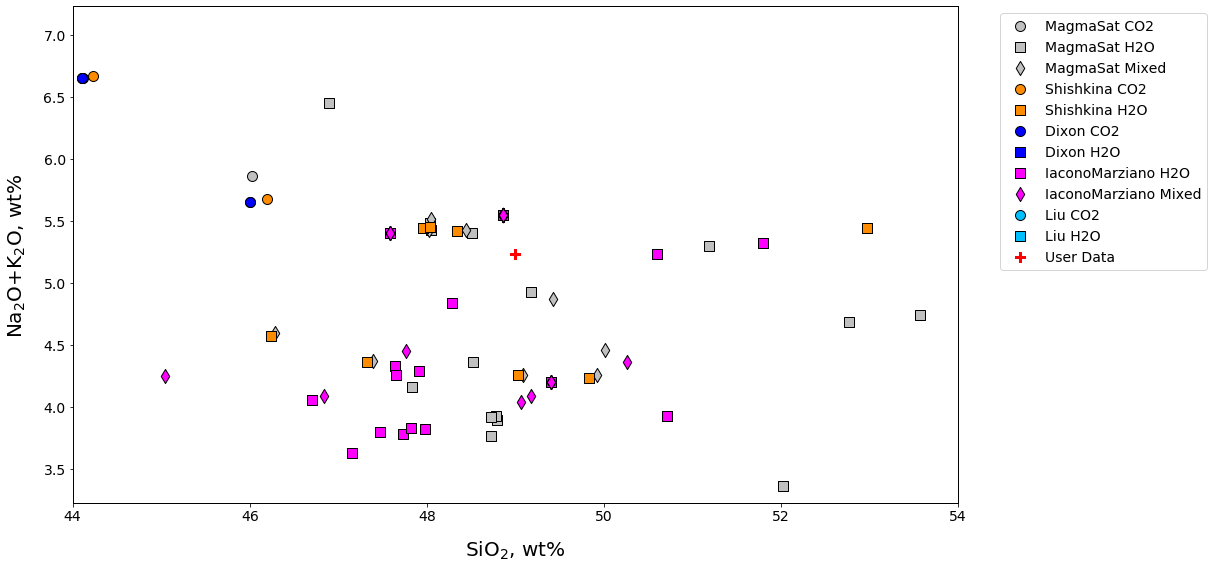

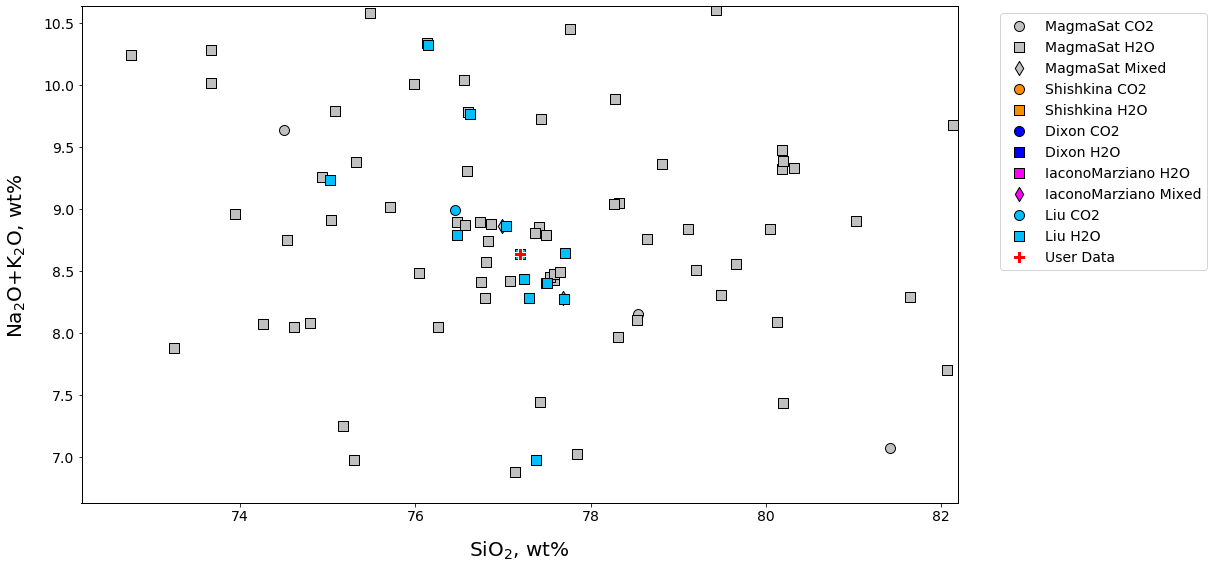

In [15]:
#check calibration
v.calib_plot(user_data=alkbasalt, model='mixed', zoom='user_data')
v.calib_plot(user_data=rhyolite, model='mixed', zoom='user_data')

In [5]:
alkbasalt_isobars, alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, temperature=1200, pressure_list=[500, 1000, 2000], isopleth_list=[0.5], print_status=True).result

rhyolite_isobars, rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=rhyolite, temperature=800, pressure_list=[500, 1000, 2000], isopleth_list=[0.5]).result


Calculating isobar at 500 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 1000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 2000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!
Calculating isobar at 500 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 1000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Calculating isobar at 2000 bars
Calculating isopleth at 0
Calculating isopleth at 0.5
Calculating isopleth at 1
Done!


In [6]:
Iac_alkbasalt_isobars, Iac_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, temperature=1200, pressure_list=[500, 1000, 2000], isopleth_list=[0.5], model="IaconoMarziano").result
Dixon_alkbasalt_isobars, Dixon_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, temperature=1200, pressure_list=[500, 1000, 2000], isopleth_list=[0.5], model="Dixon").result
Shish_alkbasalt_isobars, Shish_alkbasalt_isopleths = v.calculate_isobars_and_isopleths(sample=alkbasalt, temperature=1200, pressure_list=[500, 1000, 2000], isopleth_list=[0.5], model="Shishkina").result

Liu_rhyolite_isobars, Liu_rhyolite_isopleths = v.calculate_isobars_and_isopleths(sample=rhyolite, temperature=800, pressure_list=[500, 1000, 2000], isopleth_list=[0.5], model="Liu").result

../../../VESIcal.py:1719: RuntimeWarning: pressure exceeds 1000 bar, which Iacono-Marziano et al. (2012) suggest as an upper calibration limit of the Dixon (1997, Pi-SiO2 simpl.) Model, 
  w.warn(self.calib_check,RuntimeWarning)
../../../VESIcal.py:1719: RuntimeWarning:  These calibration limits were selected based on the minimum and maximum values of these oxides (+-5%) in the calibration dataset. As the Liu et al. model incorperates no term for compositional dependence, users must take extreme care when extrapolating this model to compositions which differ significantly from the haplogranites and rhyolites in the calibration dataset. These warnings are simply a guide; we suggest that users carefully compare their major element data to the calibration dataset to check for suitability 
  w.warn(self.calib_check,RuntimeWarning)


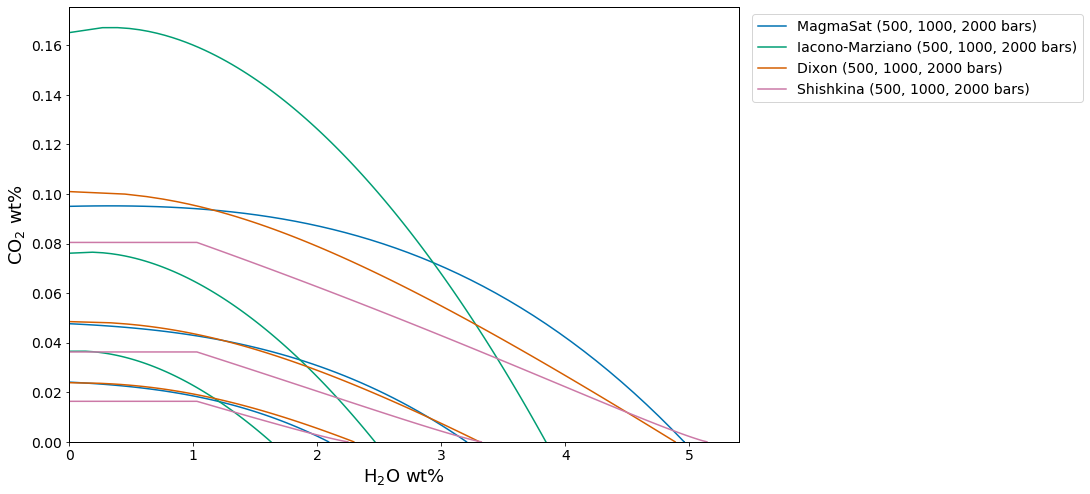

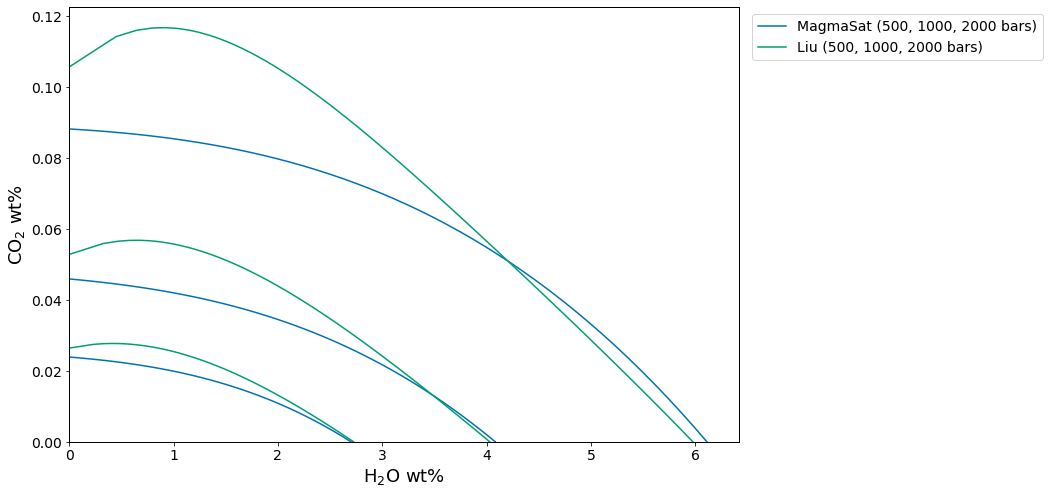

In [9]:
v.plot(isobars=[alkbasalt_isobars, Iac_alkbasalt_isobars, Dixon_alkbasalt_isobars, Shish_alkbasalt_isobars], isobar_labels=["MagmaSat", "Iacono-Marziano", "Dixon", "Shishkina"])
v.plot(isobars=[rhyolite_isobars, Liu_rhyolite_isobars], isobar_labels=["MagmaSat", "Liu"])

In [ ]:
v.plot(isobars=Shish_alkbasalt_isobars)